In [51]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"C:\Users\drsai\OneDrive\Documents\movies.csv")


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
for col in df.columns:
 pct_missing = np.mean(df[col].isnull())
 print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [14]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [12]:
df = df.dropna(subset=["score", "votes","gross","budget","runtime"])
df["score"] = df["score"].astype("int64")
df["votes"] = df["votes"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["budget"] = df["budget"].astype("int64")
df["runtime"] = df["runtime"].astype("int64")



In [18]:
df.sort_values(by=['gross'],inplace=False, ascending=False).head(27)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


In [20]:
pd.set_option('display.max_rows', None)

In [22]:
df['company'].drop_duplicates().sort_values(ascending= False).head(27)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
3776                         double A Films
3330            Zucker Brothers Productions
146                        Zoetrope Studios
2213                     Zeta Entertainment
3698                Zentropa Entertainments
1180                   Zenith Entertainment
5180                        Zazen Produções
1321               Zanuck/Brown Productions
1329            Zacharias-Buhai Productions
789               Young Sung Production Co.
5125             Young Hannibal Productions
5499                            Yellow Bird
4618                         Yash Raj Films
4990              Yari Film Group Releasing
5410                  Yari Film Group (YFG)
5583                  X-Filme Creative Pool
6265                Worldview Entertainment
4392            World of Wonder 

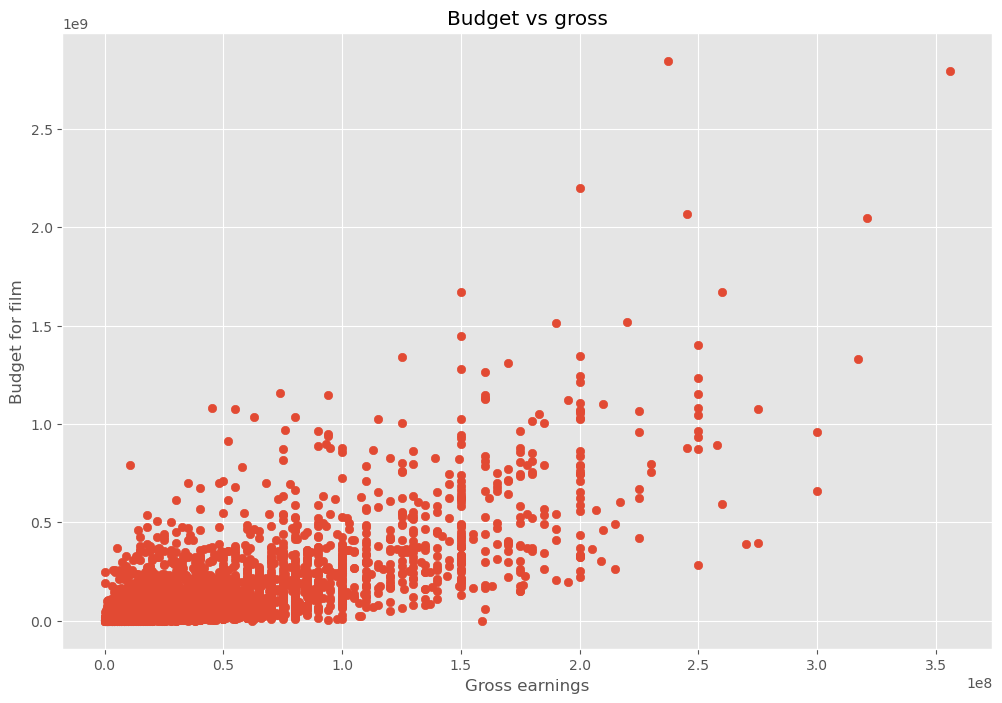

In [24]:
plt.scatter(x= df['budget'], y=df['gross'])

plt.title('Budget vs gross')

plt.xlabel('Gross earnings')

plt.ylabel('Budget for film')

plt.show()

In [26]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


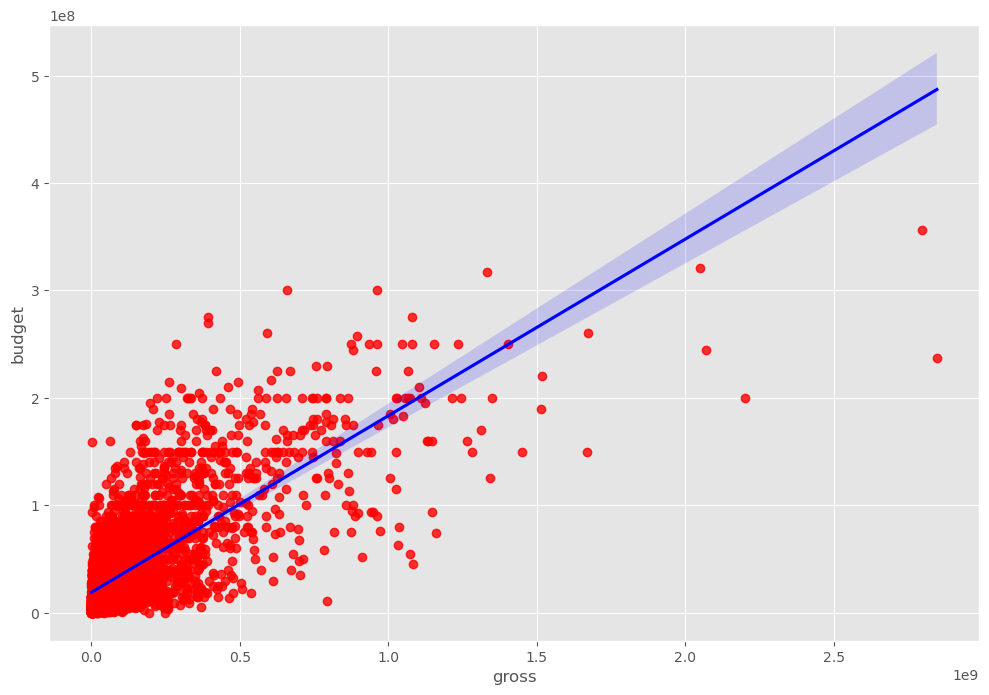

In [28]:
# plot budget vs gross in seaborns

sns.regplot(x='gross', y='budget', data=df , scatter_kws={'color' :'red'}, line_kws={'color':'blue'})

plt.show()

In [30]:
df.corr(numeric_only = True, method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.055773,0.205852,0.327793,0.274354,0.074203
score,0.055773,1.000000,0.455285,0.066064,0.211406,0.395427
votes,0.205852,0.455285,1.000000,0.440035,0.614895,0.352437
budget,0.327793,0.066064,0.440035,1.000000,0.740410,0.318595
gross,0.274354,0.211406,0.614895,0.740410,1.000000,0.275596
runtime,0.074203,0.395427,0.352437,0.318595,0.275596,1.000000


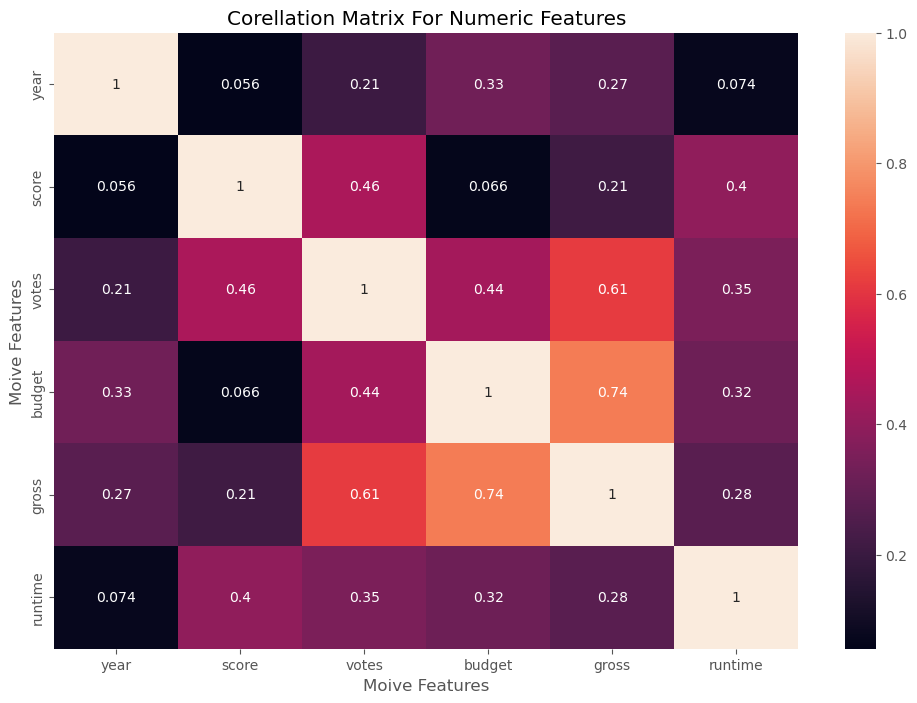

In [32]:
corellaton_matrix = df.corr(numeric_only = True, method='pearson')

sns.heatmap(corellaton_matrix , annot =True)

plt.title('Corellation Matrix For Numeric Features')

plt.xlabel('Moive Features')

plt.ylabel('Moive Features')

plt.show()

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [49]:
df_numerized = df

for col_name in df_numerized.columns :
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0


In [53]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


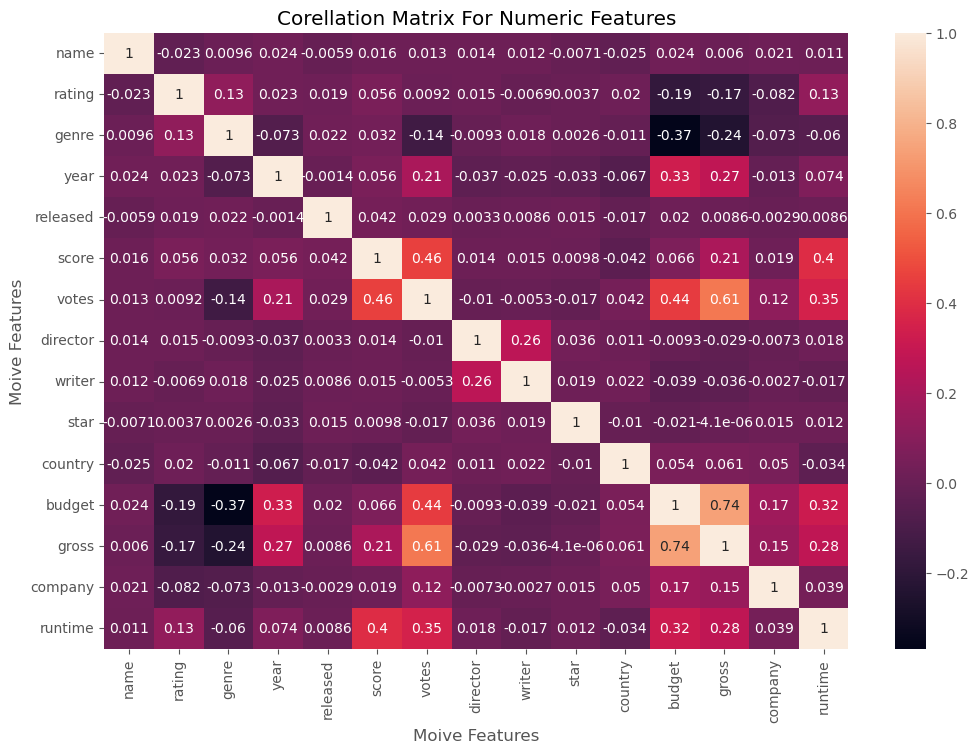

In [42]:
corellaton_matrix = df_numerized.corr(numeric_only = True, method='pearson')

sns.heatmap(corellaton_matrix , annot =True)

plt.title('Corellation Matrix For Numeric Features')

plt.xlabel('Moive Features')

plt.ylabel('Moive Features')

plt.show()

In [44]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(27)

name    name        1.000000
        rating     -0.023011
        genre       0.009647
        year        0.024418
        released   -0.005889
        score       0.015787
        votes       0.012923
        director    0.013698
        writer      0.011576
        star       -0.007111
        country    -0.024563
        budget      0.023695
        gross       0.005973
        company     0.021216
        runtime     0.010801
rating  name       -0.023011
        rating      1.000000
        genre       0.128076
        year        0.022705
        released    0.018821
        score       0.056003
        votes       0.009241
        director    0.014848
        writer     -0.006881
        star        0.003740
        country     0.020160
        budget     -0.186890
dtype: float64

In [46]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(27)

budget    genre      -0.368932
genre     budget     -0.368932
gross     genre      -0.244499
genre     gross      -0.244499
rating    budget     -0.186890
budget    rating     -0.186890
rating    gross      -0.168829
gross     rating     -0.168829
genre     votes      -0.136573
votes     genre      -0.136573
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073306
company   genre      -0.073306
genre     year       -0.072815
year      genre      -0.072815
          country    -0.066730
country   year       -0.066730
runtime   genre      -0.060186
genre     runtime    -0.060186
country   score      -0.042003
score     country    -0.042003
budget    writer     -0.039448
writer    budget     -0.039448
year      director   -0.036942
director  year       -0.036942
gross     writer     -0.035920
dtype: float64

In [341]:
High_corr = sorted_pairs[(sorted_pairs) > 0.5]
High_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget has high correlation with gross